In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime

import warnings
warnings.filterwarnings(action = 'ignore')

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# Goal : Predict Customer Life-time Value (Customer Lifetime Value )for an Auto Insurance Company.

Customer lifetime value is the net profit acquired from a customer throughout a company’s relationship with them.

Knowing each customer’s customer lifetime value helps you know how much you should be spending on customer acquisition. A customer’s acquisition cost could be more than what they spend on their purchase, but if you nurture that relationship, their Customer Lifetime Value may grow to an amount that’s well worth the investment. That’s just one of the many reasons why success in the customer-centered economy means understanding the importance of customer lifetime value.

In [2]:
df = pd.read_csv(r'C:\Users\Imran\Desktop\Insurance_Marketing-Customer-Value-Analysis.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.52,6979.54,12887.43,7645.86,2813.69
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,02-Mar-11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [6]:
#lets edit date format
df['Effective To Date'] = df['Effective To Date'].astype('datetime64[ns]')

In [7]:
df['Effective To Date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-03-02
          ...    
9129   2011-10-02
9130   2011-12-02
9131   2011-06-02
9132   2011-03-02
9133   2011-02-14
Name: Effective To Date, Length: 9134, dtype: datetime64[ns]

There are 9134 Observations of 24 Different Variable. (mix of categorical and continous DataType)

Dependent Variable is Customer Life Time Value as we have to predict the Customer Lifetime Value.

Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage, Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus, MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType, SalesChannel, TotalClaimAmountVehicleClass, VehicleSize

Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TotalClaimAmount

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [9]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

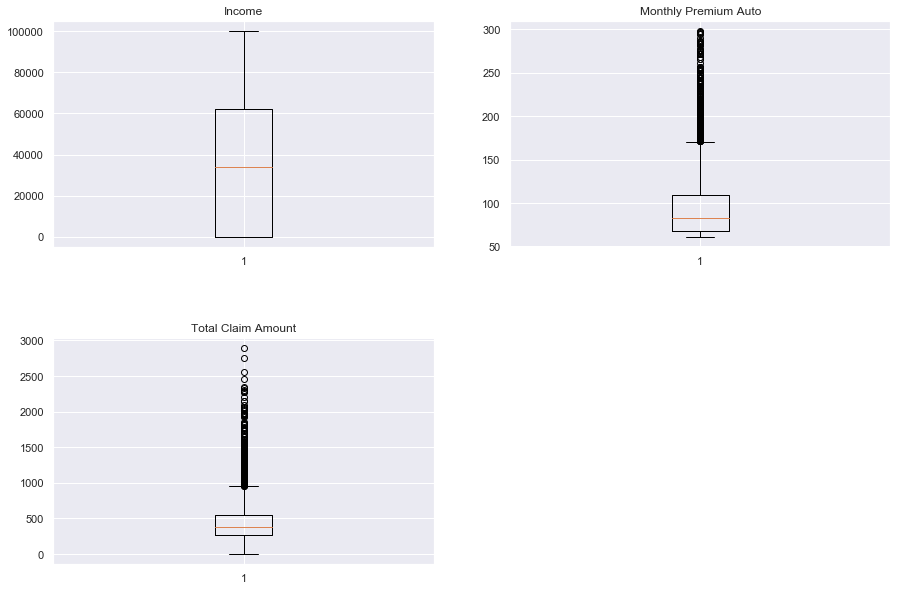

In [10]:
# looking at outliers of continious variable
significant_outlier = ['Income','Monthly Premium Auto','Total Claim Amount']

sns.set(color_codes = True )
plt.figure(figsize = (15,10))
plt.subplots_adjust(hspace = .4)

for i in range(len(significant_outlier)):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[significant_outlier[i]])
    plt.title(significant_outlier[i])
plt.show()
    

As it can be seen there are outliers in the total claim amount and also in monthly premium auto , usually we remove the outliers for a better model. Since our dataset is related to insurance industry, outliers can be our potential customer. 

There are no outliers in the income.

In [11]:
#checking all categorical variables to determine significant ones.

cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns
cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

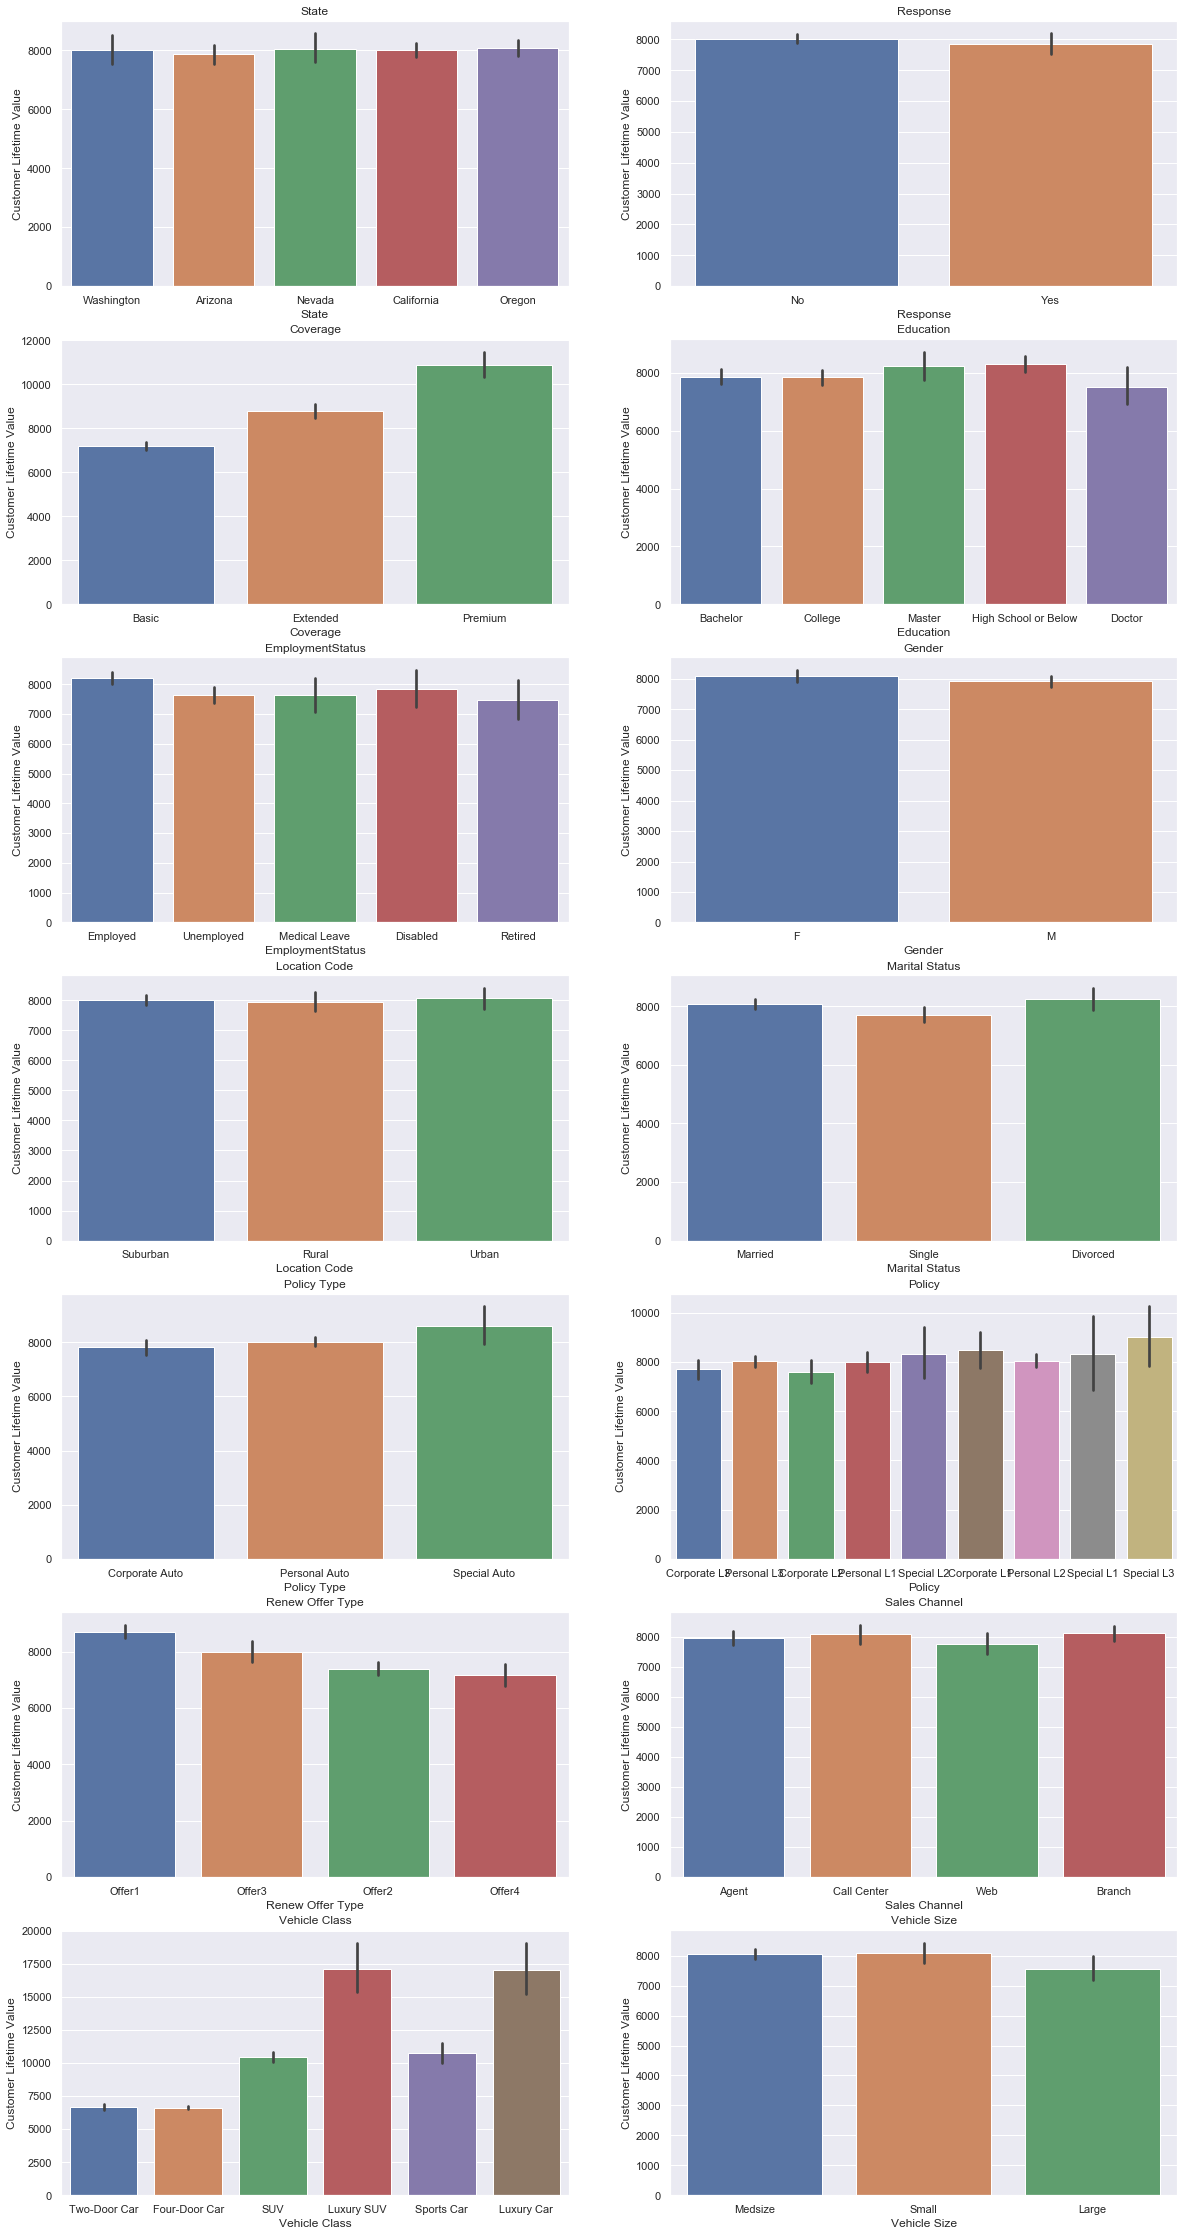

In [12]:
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20,40))

for i in range(len(cols)):
    plt.subplot(7,2,i+1)
    sns.barplot(x = cols[i], y = df['Customer Lifetime Value'], data = df)
    plt.title(cols[i])
    
plt.show()

Interpretations from graphs:

Customer Lifetime Value is different for different types of coverage and vehical class and the remaining variable have more or less same.

In [13]:
df['Number of Policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

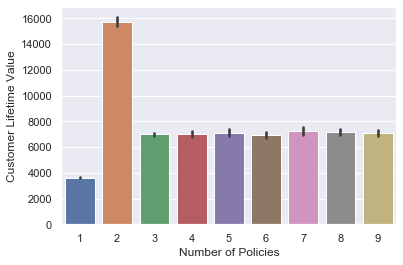

In [14]:
sns.barplot(x = df['Number of Policies'], y = df['Customer Lifetime Value'], data = df)

In [15]:
df['Number of Policies'] = np.where(df['Number of Policies']>2,3,df['Number of Policies'])

In [16]:
df['Number of Policies'].value_counts()

3    3589
1    3251
2    2294
Name: Number of Policies, dtype: int64

Interpretations from graphs:

Customers who have taken only 1 policy have lower customer lifetime value and customers who have taken 3 or greater show a similar trend. So, we can combine all of them into one bin and we can also see that the customers who have taken 2 policies have very high customer lifetime value comparitively.

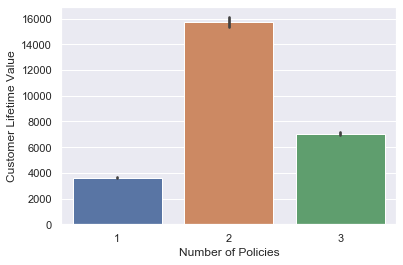

In [17]:
sns.barplot(x = df['Number of Policies'], y = df['Customer Lifetime Value'], data = df)

# Statistical Analysis
Interpretation of graphs gives us some insights but we need to do statistical analysis for statistically significant variables and more clear results.

Considering Customer Lifetime Value (Customer Lifetime Value) as the target variable, we will try to understand how each of the independent variables are contributing towards the target variable.

Because our target variable Customer Lifetime Value is a continuous variable, we will have to perform f test/ ANOVA to understand how significant are the independent variables towards target variable.

Considering CLTV (Customer Lifetime Value) as the target variable, we shall try to understand how each of the independent variables are contributing towards the target variable.
Since our target variable is a continuous variable, we will have to perform ANOVA to understand how significant are the independent variables towards target variable.
# For ANOVA,
Null hypothesis is that there is no significant difference among the groups
Alternative hypothesis is that there is asignificant difference

In [18]:
# Test whether Gender differences are significant or not.
gender = df[['Customer Lifetime Value','Gender']].groupby('Gender')
female = gender['Customer Lifetime Value'].get_group('F')
male = gender['Customer Lifetime Value'].get_group('M')

In [19]:
stats.ttest_ind(female,male)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

MEANS ARE SAME FOR GENDER

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [20]:
# Test whether Covarage differences are significant or not.
Coverage = df[['Customer Lifetime Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer Lifetime Value'].get_group('Basic')
Extended = Coverage['Customer Lifetime Value'].get_group('Extended')
Premium =Coverage['Customer Lifetime Value'].get_group('Premium')

In [21]:
stats.f_oneway(Basic,Extended,Premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Coverage' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [23]:
# Test whether Marital Status differences are significant or not.

Marital = df[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
married = Marital['Customer Lifetime Value'].get_group('Married')
single = Marital['Customer Lifetime Value'].get_group('Single')


In [24]:
stats.ttest_ind(married,single)

Ttest_indResult(statistic=2.1813329263939916, pvalue=0.029188701551162235)

pvalue < 0.05 shows that there is significant difference in the mean of target variable for at least one group of 'Marital Status' that means 'Marital Status' could be a significant feature for predicting 'Customer Lifetime Value'

In [25]:
# Test whether Vehicle Class differences are significant or not.

Vehicleclass = df[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fourdoor = Vehicleclass['Customer Lifetime Value'].get_group('Four-Door Car')
twodoor = Vehicleclass['Customer Lifetime Value'].get_group('Two-Door Car')
suv = Vehicleclass['Customer Lifetime Value'].get_group('SUV')
luxurysuv =Vehicleclass['Customer Lifetime Value'].get_group('Luxury SUV')
luxurycar =Vehicleclass['Customer Lifetime Value'].get_group('Luxury Car')
sportscar =Vehicleclass['Customer Lifetime Value'].get_group('Sports Car')

In [26]:
stats.f_oneway(fourdoor,twodoor,suv,luxurysuv,luxurycar,sportscar)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

no significance

In [27]:
# Test whether Renew Offer Type differences are significant or not.
Renewoffer = df[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
offer1 = Renewoffer['Customer Lifetime Value'].get_group('Offer1')
offer2 = Renewoffer['Customer Lifetime Value'].get_group('Offer2')
offer3 = Renewoffer['Customer Lifetime Value'].get_group('Offer3')
offer4 =Renewoffer['Customer Lifetime Value'].get_group('Offer4')

In [28]:
stats.f_oneway(offer1,offer2,offer3,offer4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

In [29]:
# Test whether EmploymentStatus differences are significant or not.


EmploymentStatus = df[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = EmploymentStatus['Customer Lifetime Value'].get_group('Employed')
unemployed = EmploymentStatus['Customer Lifetime Value'].get_group('Unemployed')
medleave = EmploymentStatus['Customer Lifetime Value'].get_group('Medical Leave')
disabled = EmploymentStatus['Customer Lifetime Value'].get_group('Disabled')
retired = EmploymentStatus['Customer Lifetime Value'].get_group('Retired')

In [31]:
stats.f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'EmploymentStatus' which means 'EmploymentStatus' feature can be a significant for predicting 'Customer Lifetime Value'

In [33]:
# Test whether Education differences are significant or not.

Education = df[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [34]:
stats.f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

In [35]:
# Test whether Education differences are significant or not.

State = df[['Customer Lifetime Value','State']].groupby('State')
California = State['Customer Lifetime Value'].get_group('California')
Oregon = State['Customer Lifetime Value'].get_group('Oregon')
Arizona = State['Customer Lifetime Value'].get_group('Arizona')
Nevada = State['Customer Lifetime Value'].get_group('Nevada')
Washington = State['Customer Lifetime Value'].get_group('Washington')

In [36]:
stats.f_oneway(California,Oregon,Arizona,Nevada,Washington)

F_onewayResult(statistic=0.27289285462119284, pvalue=0.8955985932127517)

In [34]:
# P> 0.05 no significance

In [37]:
# Test whether Marital Status differences are significant or not.
Response = df[['Customer Lifetime Value','Response']].groupby('Response')
Yes  =   Response['Customer Lifetime Value'].get_group('Yes')
No        =   Response['Customer Lifetime Value'].get_group('No')


In [38]:
stats.ttest_ind(Yes,No)

Ttest_indResult(statistic=-0.8533582829612565, pvalue=0.393483030479461)

In [39]:
Vehicle = df[['Customer Lifetime Value','Vehicle Size']].groupby('Vehicle Size')
Medsize     = Vehicle['Customer Lifetime Value'].get_group('Medsize')
Small       = Vehicle['Customer Lifetime Value'].get_group('Small')
Large       = Vehicle['Customer Lifetime Value'].get_group('Large')

In [40]:
stats.f_oneway(Medsize,Small,Large)

F_onewayResult(statistic=2.382494601032998, pvalue=0.09237737701331775)

In [42]:
Policy = df[['Customer Lifetime Value','Policy']].groupby('Policy')
PersonalL3     = Policy['Customer Lifetime Value'].get_group('Personal L3')
PersonalL2       = Policy['Customer Lifetime Value'].get_group('Personal L2')
PersonalL1        = Policy['Customer Lifetime Value'].get_group('Personal L1')
CorporateL3        = Policy['Customer Lifetime Value'].get_group('Corporate L3')
CorporateL2       = Policy['Customer Lifetime Value'].get_group('Corporate L2')
CorporateL1        = Policy['Customer Lifetime Value'].get_group('Corporate L1')
SpecialL2        = Policy['Customer Lifetime Value'].get_group('Special L2')
SpecialL3       = Policy['Customer Lifetime Value'].get_group('Special L3')
SpecialL1        = Policy['Customer Lifetime Value'].get_group('Special L1')

In [43]:
stats.f_oneway(PersonalL3,PersonalL2,PersonalL1,CorporateL3,CorporateL2,CorporateL1,SpecialL2,SpecialL3,SpecialL1)

F_onewayResult(statistic=1.1839990669675133, pvalue=0.3041951364145143)

In [44]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [45]:
LocationCode = df[['Customer Lifetime Value','Location Code']].groupby('Location Code')
Suburban         = LocationCode['Customer Lifetime Value'].get_group('Suburban')
Rural        = LocationCode['Customer Lifetime Value'].get_group('Rural')
Urban               = LocationCode['Customer Lifetime Value'].get_group('Urban')

In [46]:
stats.f_oneway(Suburban,Rural,Urban)

F_onewayResult(statistic=0.10800210605345337, pvalue=0.8976268526407198)

In [47]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [48]:
PolicyType = df[['Customer Lifetime Value','Policy Type']].groupby('Policy Type')
PersonalAuto         = PolicyType['Customer Lifetime Value'].get_group('Personal Auto')
CorporateAuto         = PolicyType['Customer Lifetime Value'].get_group('Corporate Auto')
SpecialAuto               = PolicyType['Customer Lifetime Value'].get_group('Special Auto')

In [49]:
stats.f_oneway(PersonalAuto,CorporateAuto,SpecialAuto)

F_onewayResult(statistic=2.1836446340486555, pvalue=0.11268909882175004)

In [50]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [51]:
SalesChannel = df[['Customer Lifetime Value','Sales Channel']].groupby('Sales Channel')
Agent                   = SalesChannel['Customer Lifetime Value'].get_group('Agent')
Branch          = SalesChannel['Customer Lifetime Value'].get_group('Branch')
CallCenter               = SalesChannel['Customer Lifetime Value'].get_group('Call Center')
Web                  = SalesChannel['Customer Lifetime Value'].get_group('Web')

In [52]:
stats.f_oneway(Agent,Branch,CallCenter,Web)

F_onewayResult(statistic=0.8805454785276248, pvalue=0.4502779502550758)


### So we did the EDA and also the Statistical Analysis, so now we can just disregard the features which that are not significant for our model.
## Furthur Modelling:

In [53]:
df2 =df.copy()

In [54]:
df2.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

In [55]:
df2.head()

,Customer Lifetime Value,Education,EmploymentStatus,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.52,Bachelor,Employed,56274,Married,69,32,5,0,1,384.81
1,6979.54,Bachelor,Unemployed,0,Single,94,13,42,0,3,1131.46
2,12887.43,Bachelor,Employed,48767,Married,108,18,38,0,2,566.47
3,7645.86,Bachelor,Unemployed,0,Married,106,18,65,0,3,529.88
4,2813.69,Bachelor,Employed,43836,Single,73,12,44,0,1,138.13


Although months since policy inception, months since last claim, number of open complaints and number of policies are all numerical we will consider them as categorical features while preparing the model because numerical values are not high.

In [56]:
new = pd.get_dummies(df2,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

In [57]:
new

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2763.52,56274,69,32,5,0,384.81,1,0,0,0,0,0,0,0,1,0,0,0
1,6979.54,0,94,13,42,0,1131.46,0,1,0,1,0,0,0,0,0,0,0,1
2,12887.43,48767,108,18,38,0,566.47,1,0,1,0,0,0,0,0,1,0,0,0
3,7645.86,0,106,18,65,0,529.88,1,0,0,1,0,0,0,0,0,0,0,1
4,2813.69,43836,73,12,44,0,138.13,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,198.23,1,0,1,0,0,0,0,0,1,0,0,0
9130,3096.51,21604,79,14,28,0,379.20,0,0,0,0,1,0,0,0,1,0,0,0
9131,8163.89,0,85,9,37,3,790.78,0,1,1,0,0,0,0,0,0,0,0,1
9132,7524.44,21941,96,34,3,0,691.20,1,0,0,1,1,0,0,0,1,0,0,0


# Continuous Variables¶
Check continious variables and relations of them with categorical variables to see if there is any possibility to create new categorical variables from continuous ones.

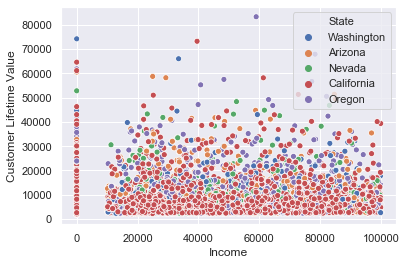

In [58]:
ax = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State",
                     data=df)

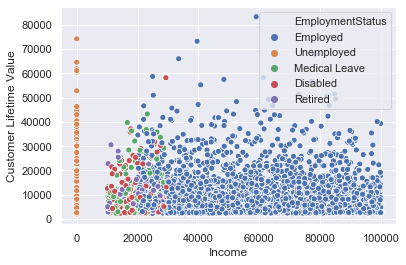

In [59]:
maritalstts = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus",
                     data=df)

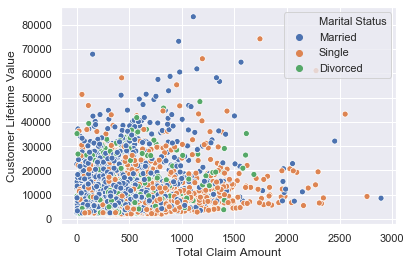

In [57]:
ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status",
                     data=df)

There is no obvious pattern to create new categorical variable from continious variables. So far, I have explored the dataset in detail and got familiar with it. Now it is time to create the model and see if I can predict Customer Life Time Value.

# Model 1

In [60]:
import statsmodels.api as sm

y = new['Customer Lifetime Value']
x = new.drop('Customer Lifetime Value',axis=1)


x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.635
Model:                                 OLS   Adj. R-squared:                  0.634
Method:                      Least Squares   F-statistic:                     881.3
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                             19:46:05   Log-Likelihood:                -89055.
No. Observations:                     9134   AIC:                         1.781e+05
Df Residuals:                         9115   BIC:                         1.783e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4542.3757    293.171    -15.494      0.000   -5117.057   -3967.695
Income                            -0.0002      0.003     -0.079      0.937      -0.005       0.005
Monthly Premium Auto              81.0831      1.737     46.668      0.000      77.677      84.489
Months Since Last Claim            6.4917      4.325      1.501      0.133      -1.987      14.971
Months Since Policy Inception      1.5718      1.562      1.006      0.314      -1.490       4.633
Number of Open Complaints       -171.5099     47.808     -3.587      0.000    -265.224     -77.795
Total Claim Amount                -0.1930      0.225     -0.856      0.392      -0.635       0.249
Marital Status_Married            33.9681    127.171      0.267      0.789    -215.315     283.251
Marital Status_Single           -208.7504    148.349     -1.407      0.159    -499.547      82.047
Number of Policies_2             1.22e+04    113.393    107.606      0.000     1.2e+04    1.24e+04
Number of Policies_3            3600.8570    100.695     35.760      0.000    3403.473    3798.241
Education_College                -56.3720    112.894     -0.499      0.618    -277.669     164.925
Education_Doctor                 244.3697    239.216      1.022      0.307    -224.548     713.287
Education_High School or Below   211.2366    114.012      1.853      0.064     -12.253     434.726
Education_Master                 273.2142    173.096      1.578      0.115     -66.093     612.522
EmploymentStatus_Employed        674.0190    232.670      2.897      0.004     217.934    1130.104
EmploymentStatus_Medical Leave   503.8212    287.883      1.750      0.080     -60.495    1068.137
EmploymentStatus_Retired         -49.6053    323.511     -0.153      0.878    -683.759     584.549
EmploymentStatus_Unemployed       45.6754    234.824      0.195      0.846    -414.632     505.983
==============================================================================
Omnibus:                     7121.966   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239144.603
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      27.089   Cond. No.                     5.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Then I will split my dataset into training and testing data which means I will select 25% of the data randomly and separate it from the training data. (test_size shows the percentage of the test data – 25%) (If you don’t specify the random_state in your code, then every time you run (execute) your code, a new random value is generated and training and test datasets would have different values each time.)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.638
Model:                                 OLS   Adj. R-squared:                  0.637
Method:                      Least Squares   F-statistic:                     670.1
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                             19:46:17   Log-Likelihood:                -66724.
No. Observations:                     6850   AIC:                         1.335e+05
Df Residuals:                         6831   BIC:                         1.336e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4444.2189    336.302    -13.215      0.000   -5103.476   -3784.961
Income                            -0.0005      0.003     -0.178      0.858      -0.006       0.005
Monthly Premium Auto              82.0071      2.007     40.867      0.000      78.073      85.941
Months Since Last Claim           10.4677      4.924      2.126      0.034       0.815      20.121
Months Since Policy Inception      0.7055      1.787      0.395      0.693      -2.797       4.208
Number of Open Complaints       -140.7293     54.949     -2.561      0.010    -248.447     -33.011
Total Claim Amount                -0.1445      0.261     -0.554      0.579      -0.656       0.366
Marital Status_Married          -129.8938    144.796     -0.897      0.370    -413.739     153.951
Marital Status_Single           -352.2025    168.453     -2.091      0.037    -682.422     -21.983
Number of Policies_2            1.209e+04    129.979     92.984      0.000    1.18e+04    1.23e+04
Number of Policies_3            3567.1377    115.382     30.916      0.000    3340.953    3793.322
Education_College               -174.4652    129.164     -1.351      0.177    -427.668      78.737
Education_Doctor                 168.9490    277.539      0.609      0.543    -375.113     713.011
Education_High School or Below   131.1008    130.374      1.006      0.315    -124.472     386.674
Education_Master                 209.1596    198.976      1.051      0.293    -180.895     599.214
EmploymentStatus_Employed        730.4381    265.926      2.747      0.006     209.139    1251.737
EmploymentStatus_Medical Leave   500.6632    327.850      1.527      0.127    -142.025    1143.352
EmploymentStatus_Retired        -187.8947    369.425     -0.509      0.611    -912.083     536.294
EmploymentStatus_Unemployed      -29.0894    267.846     -0.109      0.914    -554.151     495.973
==============================================================================
Omnibus:                     5524.817   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213180.203
Skew:                           3.592   Prob(JB):                         0.00
Kurtosis:                      29.369   Cond. No.                     5.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

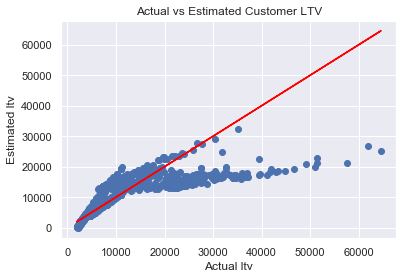

In [62]:
# Model graph to see predictions


x_test = sm.add_constant(x_test)

y_preds = results.predict(x_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV")
plt.show()

In [63]:
#lets see their errors

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2131.2150468419845
Mean Sq. Error (MSE)          : 18223563.69606286
Root Mean Sq. Error (RMSE)     : 4268.906615992303
Mean Abs. Perc. Error (MAPE) : 23.902650971762732


In [64]:
all_score = []

all_score.append((results.rsquared,
                  mean_absolute_error(y_test, y_preds),
                 mse(y_test, y_preds),rmse(y_test, y_preds),
                 np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [63]:
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

# CHECKING ASSUMPTIONS FOR LINEAR REGRESSION

# Linearity

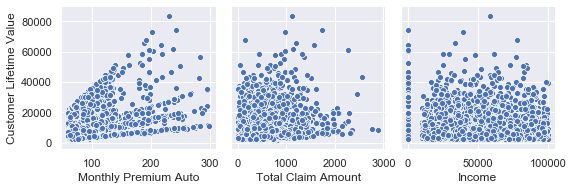

In [65]:
sns.pairplot(x_vars=['Monthly Premium Auto','Total Claim Amount','Income'],y_vars =['Customer Lifetime Value'],data = new)
plt.show()

We don't see any linear relationship between the variables and the Y varible , which fail's the first assumption of linear regression.

# Homosedusticity

Linearity & Equal variance
Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

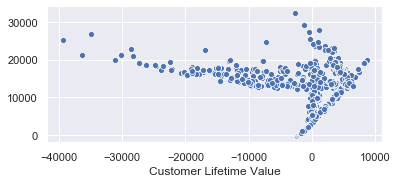

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
residuals = y_pred-y_test

fig, ax = plt.subplots(figsize=(6,2.5))
sns.scatterplot(residuals, y_pred)

It seems like the corresponding residual plot is reasonably random. To confirm that, let’s go with a hypothesis test,

Goldfeld-Quandt homoskedasticity test.

This test examines whether the residual variance is the same in 2 subsamples.

In [67]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,x_test)
lzip(name, test)

[('F statistic', 1.215219539130517), ('p-value', 0.000551635962718633)]

H0: Error terms are homoscedastic
Ha: Error terms are not homoscedastic
p-value < 0.05 reject null hypothesis, error terms are not homoscedastic

#### The distribution clearly show's that the residuals are not normally distributed, and the third assumption also fail's.

# Multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns.values

In [70]:
vif

,VIF,Features
0,45.48,const
1,3.08,Income
2,1.89,Monthly Premium Auto
3,1.00,Months Since Last Claim
4,1.00,Months Since Policy Inception
5,1.00,Number of Open Complaints
6,2.27,Total Claim Amount
7,2.08,Marital Status_Married
8,2.30,Marital Status_Single
9,1.28,Number of Policies_2


As we can see, EmploymentStatus_Employed and EmploymentStatus_Unemployed have very high values of VIF, indicating that these two variables are highly correlated. Hence, considering these two features together leads to a model with high multicollinearity.

# Auto Correlationc/Test of normality of residuals

The Durbin Watson statistic is a test statistic used in statistics to detect autocorrelation in the residuals from a regression analysis. The Durbin Watson statistic will always assume a value between 0 and 4.

One of the assumptions of linear regression is that there is no correlation between the residuals. In other words, the residuals are assumed to be independent.

H0 (null hypothesis): There is no correlation among the residuals.

HA (alternative hypothesis): The residuals are autocorrelated.

In [70]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(results.resid)

2.0215313308305034

the value is between 0 and 4,,we fail to reject the null hypothesis, auto co relation is absent/There is no correlation among the residuals.

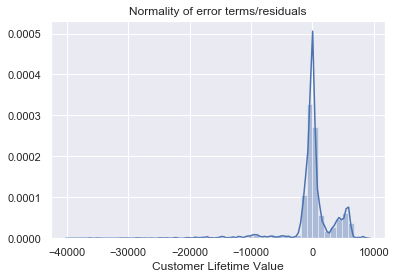

In [71]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The distribution clearly show's that the residuals are not normally distributed, and the third assumption also fail's.

### Mean Of Residuals

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
residuals = y_pred-y_test

mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is -25.228751449582656


##### The 2nd assumption is that the mean of the residual's must be close to zero, which again fail's

#### As majority of the assumption got failed so using Linear regression model will not give better prediction

# Model 2

In [86]:
#duplicate the original data and get the log  and standardize version of it to be able to reach higher R2(with outliers)
df3 = new.copy()

df3['Monthly Premium Auto']  = np.log(new['Monthly Premium Auto']) 
df3['Total Claim Amount'] = np.log(new['Total Claim Amount'])
df3['Months Since Last Claim'] = np.log((new['Months Since Last Claim']+1))
df3['Months Since Policy Inception'] = np.log((new['Months Since Policy Inception']+1))
y = np.log(new['Customer Lifetime Value'])




In [87]:
from sklearn.preprocessing import StandardScaler 

In [88]:
ss = StandardScaler()

In [89]:
df3['Income'] = ss.fit_transform(new['Income'].values.reshape(-1, 1))

In [90]:
df3

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2763.52,0.61,4.23,3.50,1.79,0,5.95,1,0,0,0,0,0,0,0,1,0,0,0
1,6979.54,-1.24,4.54,2.64,3.76,0,7.03,0,1,0,1,0,0,0,0,0,0,0,1
2,12887.43,0.37,4.68,2.94,3.66,0,6.34,1,0,1,0,0,0,0,0,1,0,0,0
3,7645.86,-1.24,4.66,2.94,4.19,0,6.27,1,0,0,1,0,0,0,0,0,0,0,1
4,2813.69,0.20,4.29,2.56,3.81,0,4.93,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.99,1.13,4.29,2.94,4.50,0,5.29,1,0,1,0,0,0,0,0,1,0,0,0
9130,3096.51,-0.53,4.37,2.71,3.37,0,5.94,0,0,0,0,1,0,0,0,1,0,0,0
9131,8163.89,-1.24,4.44,2.30,3.64,3,6.67,0,1,1,0,0,0,0,0,0,0,0,1
9132,7524.44,-0.52,4.56,3.56,1.39,0,6.54,1,0,0,1,1,0,0,0,1,0,0,0


In [91]:
import statsmodels.api as sm

In [92]:
x1 = df3.drop(['Customer Lifetime Value'], axis = 1)

In [93]:
x1

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,0.61,4.23,3.50,1.79,0,5.95,1,0,0,0,0,0,0,0,1,0,0,0
1,-1.24,4.54,2.64,3.76,0,7.03,0,1,0,1,0,0,0,0,0,0,0,1
2,0.37,4.68,2.94,3.66,0,6.34,1,0,1,0,0,0,0,0,1,0,0,0
3,-1.24,4.66,2.94,4.19,0,6.27,1,0,0,1,0,0,0,0,0,0,0,1
4,0.20,4.29,2.56,3.81,0,4.93,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.13,4.29,2.94,4.50,0,5.29,1,0,1,0,0,0,0,0,1,0,0,0
9130,-0.53,4.37,2.71,3.37,0,5.94,0,0,0,0,1,0,0,0,1,0,0,0
9131,-1.24,4.44,2.30,3.64,3,6.67,0,1,1,0,0,0,0,0,0,0,0,1
9132,-0.52,4.56,3.56,1.39,0,6.54,1,0,0,1,1,0,0,0,1,0,0,0


In [94]:
x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size = 0.25, random_state = 450)

In [95]:
print('Train Data Count:{}'.format(x_train.shape[0]))
print('Train Data Count:{}'.format(x_test.shape[0]))

Train Data Count:6850
Train Data Count:2284


In [96]:

x_train = sm.add_constant(x_train)
results_log = sm.OLS(y_train, x_train,standardize=False).fit()


In [97]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.902
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     3512.
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                             19:58:45   Log-Likelihood:                 1179.7
No. Observations:                     6850   AIC:                            -2321.
Df Residuals:                         6831   BIC:                            -2192.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6898      0.041     90.951      0.000       3.610       3.769
Income                             0.0055      0.004      1.281      0.200      -0.003       0.014
Monthly Premium Auto               0.9868      0.009    112.061      0.000       0.970       1.004
Months Since Last Claim            0.0020      0.003      0.701      0.484      -0.004       0.007
Months Since Policy Inception     -0.0050      0.003     -1.813      0.070      -0.010       0.000
Number of Open Complaints         -0.0199      0.003     -7.327      0.000      -0.025      -0.015
Total Claim Amount                -0.0006      0.003     -0.189      0.850      -0.007       0.006
Marital Status_Married             0.0032      0.007      0.450      0.652      -0.011       0.017
Marital Status_Single             -0.0348      0.008     -4.189      0.000      -0.051      -0.019
Number of Policies_2               1.3977      0.006    217.118      0.000       1.385       1.410
Number of Policies_3               0.6928      0.006    121.244      0.000       0.682       0.704
Education_College                 -0.0060      0.006     -0.933      0.351      -0.019       0.007
Education_Doctor                   0.0185      0.014      1.343      0.179      -0.008       0.045
Education_High School or Below     0.0112      0.006      1.730      0.084      -0.001       0.024
Education_Master                   0.0260      0.010      2.644      0.008       0.007       0.045
EmploymentStatus_Employed          0.0673      0.013      5.110      0.000       0.041       0.093
EmploymentStatus_Medical Leave     0.0283      0.016      1.743      0.081      -0.004       0.060
EmploymentStatus_Retired          -0.0069      0.018     -0.375      0.708      -0.043       0.029
EmploymentStatus_Unemployed       -0.0157      0.013     -1.184      0.237      -0.042       0.010
==============================================================================
Omnibus:                     2398.223   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10568.460
Skew:                           1.665   Prob(JB):                         0.00
Kurtosis:                       8.094   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

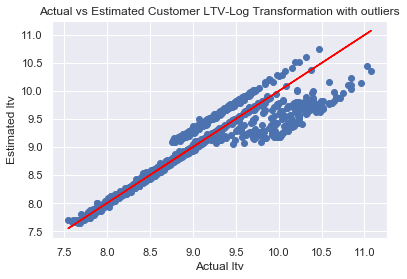

In [98]:
# Model graph to see predictions

x_test = sm.add_constant(x_test)
y_preds = results_log.predict(x_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Log Transformation with outliers")
plt.show()

In [99]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.10421888845490196
Mean Sq. Error (MSE)          : 0.042922146835948964
Root Mean Sq. Error (RMSE)     : 0.2071766078396617
Mean Abs. Perc. Error (MAPE) : 1.0978479846364264


In [100]:
# for exponential form
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)


In [101]:
print("Mean: {}".format((sum(((exp_ytest - exp_ypreds)/exp_ytest)))/len(exp_ytest)))

Mean: -0.01624988286827089


In [102]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(exp_ytest, exp_ypreds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(exp_ytest, exp_ypreds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(exp_ytest, exp_ypreds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))
print("Mean Percentage Error(MPE): {}".format((np.mean(((exp_ytest - exp_ypreds) / exp_ytest)))))


Mean Absolute Error (MAE)        : 1560.1478880268478
Mean Sq. Error (MSE)          : 16183378.251030743
Root Mean Sq. Error (RMSE)     : 4022.856976208667
Mean Abs. Perc. Error (MAPE) : 9.972598934675583
Mean Percentage Error(MPE): -0.01624988286827089


# Model 3

In [104]:
#Let's use polynomial features to see if we can do better

from sklearn.preprocessing import PolynomialFeatures

y = np.log(df3['Customer Lifetime Value'])
x = df3.drop(['Customer Lifetime Value'], axis = 1)

In [105]:
pol = PolynomialFeatures()

In [106]:
array = pol.fit_transform(x)

In [107]:
df_pol = pd.DataFrame(array)

In [108]:
df_pol.columns = pol.get_feature_names(x.columns)

In [109]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

Train Data Count: 6850
Test Data Count: 2284


In [110]:
df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.rsquared




0.906654872467143

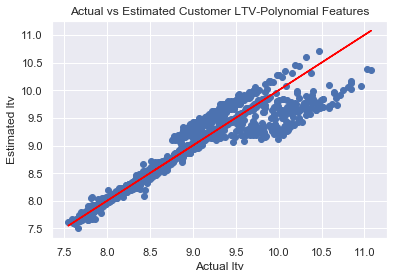

In [111]:
# Model Graph to see prediction

df_pol_test = sm.add_constant(df_pol_test)
y_preds = results_pol.predict(df_pol_test)
sns.set(color_codes = True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [112]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
#from sklearn.metrics import mean_absolute_percentage_error
#mean_absolute_percentage_error(y_test, y_preds)

Mean Absolute Error (MAE)     : 0.10950905883537805
Mean Sq. Error (MSE)          : 0.04313137347436749
Root Mean Sq. Error (RMSE)    : 0.20768094152898933
Mean Abs. Perc. Error (MAPE)  : 1.1626330560497988


Actual scores and predicted scores have good linearity but after some point we see that linearity is not good enough. In the graph, it is seen that customer life time value prediction is better with the values lower than 10.000.Lets check if there is any improvement on mean sq error term when we predict customer LTV lower than 10.000.

In [113]:
print("mean sq error term when we predict customer LTV lower than 10.000  : {}".format(mse( y_test[y_test<10],y_preds[y_test<10])))

mean sq error term when we predict customer LTV lower than 10.000  : 0.021552361739524285


We see that Mean Sq. Error decreased from 0.04 to 0.02 which is almost half of the initial error.



In [114]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

In [116]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(exp_ytest, exp_ypreds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(exp_ytest, exp_ypreds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(exp_ytest, exp_ypreds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))
#print("Mean Percentage Error(MPE): {}".format((np.mean(((exp_ytest - exp_ypreds) / exp_ytest)))))

Mean Absolute Error (MAE)        : 1575.6905934222677
Mean Sq. Error (MSE)          : 16167082.776573252
Root Mean Sq. Error (RMSE)     : 4020.8311052036556
Mean Abs. Perc. Error (MAPE) : 10.519741077979454


# Sklearn Model

In [129]:
y = np.log(df3['Customer Lifetime Value'])
x = df3.drop(['Customer Lifetime Value'], axis = 1)

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)


In [131]:
 def rsquare_cal (model,x_train,y_train,x_test,y_test):
        model.fit(x_train,y_train)
        print("Train R-square : {}".format(model.score(x_train,y_train)))
        print("Test R-square : {}".format(model.score(x_test,y_test)))

In [132]:
def mape_cal(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_preds = np.exp(model.predict(x_test))
    y_test = np.exp(y_test)
    print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


# LINEAR REGRESSION

In [133]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [134]:
rsquare_cal (lr,x_train,y_train,x_test,y_test)
mape_cal(lr,x_train,y_train,x_test,y_test)

Train R-square : 0.9024903516572503
Test R-square : 0.8998154496949345
Mean Abs. Perc. Error (MAPE) : 9.972598934675512


# DECISION TREE

In [135]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
rsquare_cal(dt,x_train,y_train,x_test,y_test)
mape_cal(dt,x_train,y_train,x_test,y_test)

Train R-square : 1.0
Test R-square : 0.8269984334400483
Mean Abs. Perc. Error (MAPE) : 11.776299775303642


# DECISION TREE HYPERTUNED


In [136]:
from sklearn.model_selection import GridSearchCV
gsv=GridSearchCV(dt,param_grid={'max_depth':range(1,10)})
gsv.fit(x_train,y_train)
gsv.best_estimator_

DecisionTreeRegressor(max_depth=7)

# DECISION TREE AFTER HYPERTUNING

In [137]:
dt1=DecisionTreeRegressor(max_depth=7)
rsquare_cal(dt1,x_train,y_train,x_test,y_test)
mape_cal(dt1,x_train,y_train,x_test,y_test)

Train R-square : 0.9195749957322207
Test R-square : 0.8902324544401617
Mean Abs. Perc. Error (MAPE) : 11.021591162474834


# RANDOM FOREST REGRESSOR

In [138]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rsquare_cal(rfr,x_train,y_train,x_test,y_test)
mape_cal(rfr,x_train,y_train,x_test,y_test)

Train R-square : 0.9876213722158869
Test R-square : 0.9071972678457711
Mean Abs. Perc. Error (MAPE) : 8.906122696407397


In [139]:
gsv=GridSearchCV(rfr,param_grid={'max_depth':range(1,10),'n_estimators':range(10,30)})
gsv.fit(x_train,y_train)
gsv.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=18)

# RANDOM FOREST REGRESSOR AFTER HYPERTUNING

In [140]:
rfr1=RandomForestRegressor(max_depth=9,n_estimators=27)
rsquare_cal(rfr1,x_train,y_train,x_test,y_test)
mape_cal(rfr1,x_train,y_train,x_test,y_test)

Train R-square : 0.9437166582843556
Test R-square : 0.9041337537610269
Mean Abs. Perc. Error (MAPE) : 9.617904533052764


# K NEAREST NEIGHBORS REGRESSOR

In [141]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
rsquare_cal(knn,x_train,y_train,x_test,y_test)
mape_cal(knn,x_train,y_train,x_test,y_test)

Train R-square : 0.8296261420603355
Test R-square : 0.735961196579395
Mean Abs. Perc. Error (MAPE) : 21.28422230640461


# BAGGING

In [142]:
from sklearn.ensemble import BaggingRegressor
bag= BaggingRegressor(dt1)
rsquare_cal(bag,x_train,y_train,x_test,y_test)
mape_cal(bag,x_train,y_train,x_test,y_test)

Train R-square : 0.9235452845716264
Test R-square : 0.8990751528537081
Mean Abs. Perc. Error (MAPE) : 10.485364150635695


# BOOSTING

In [143]:
from sklearn.ensemble import AdaBoostRegressor
boost= AdaBoostRegressor(rfr1)
rsquare_cal(boost,x_train,y_train,x_test,y_test)
mape_cal(boost,x_train,y_train,x_test,y_test)

Train R-square : 0.9557892572535751
Test R-square : 0.9017427855016111
Mean Abs. Perc. Error (MAPE) : 11.562335426608941


In [144]:
from prettytable import PrettyTable   
x = PrettyTable()
print('RESULTS OF MODELLING WITHOUT OUTLIER TREATMENT OF DEPENDENT VARIABLE (CLV)')
x.field_names = ['MODEL NAME','TRAIN SCORE','TEST SCORE','MAPE']
x.add_row(['MODEL1 OLS','0.635','0.638','23.902'])
x.add_row(['MODEL2 LOG & STANDARDIZATION','0.902','0.899','9.937'])
x.add_row(['MODEL3 POLYNOMIAL FEATURES','0.906','0.898','10.490'])
x.add_row(['LINEAR REGRESSION','0.902','0.899','9.937'])
x.add_row(['DECISION TREE','0.999','0.834','11.8399'])
x.add_row(['DECISION TREE HYPERTUNED','0.919','0.893','10.77'])
x.add_row(['RANDOM FOREST','0.986','0.905','9.11'])
x.add_row(['RANDOM FOREST HYPERTUNED','0.941','0.905','9.56'])
x.add_row(['KNN','0.841','0.751','20.287'])
x.add_row(['BAGGING','0.923','0.901','10.320'])
x.add_row(['BOOSTING','0.950','0.899','11.786'])
print(x)



RESULTS OF MODELLING WITHOUT OUTLIER TREATMENT OF DEPENDENT VARIABLE (CLV)
+------------------------------+-------------+------------+---------+
|          MODEL NAME          | TRAIN SCORE | TEST SCORE |   MAPE  |
+------------------------------+-------------+------------+---------+
|          MODEL1 OLS          |    0.635    |   0.638    |  23.902 |
| MODEL2 LOG & STANDARDIZATION |    0.902    |   0.899    |  9.937  |
|  MODEL3 POLYNOMIAL FEATURES  |    0.906    |   0.898    |  10.490 |
|      LINEAR REGRESSION       |    0.902    |   0.899    |  9.937  |
|        DECISION TREE         |    0.999    |   0.834    | 11.8399 |
|   DECISION TREE HYPERTUNED   |    0.919    |   0.893    |  10.77  |
|        RANDOM FOREST         |    0.986    |   0.905    |   9.11  |
|   RANDOM FOREST HYPERTUNED   |    0.941    |   0.905    |   9.56  |
|             KNN              |    0.841    |   0.751    |  20.287 |
|           BAGGING            |    0.923    |   0.901    |  10.320 |
|           BOO

# Model 6 - without insifnificant variance

We see some improvements when we get  RANDOM FOREST into the scene. However, there are some insignificant features in the model that p-values are more than 0.05. Thats why we will build a new model by removing insignificant features towards target variable.m

In [145]:
y = np.log(df3['Customer Lifetime Value'])
x = df3.drop(['Customer Lifetime Value'], axis = 1)

In [146]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
#model.summary()

In [147]:
#model.pvalues[model.pvalues <= 0.07].index

In [148]:
# tried with p_value <0.07
significant_features = list(model.pvalues[model.pvalues <= 0.07].index)

In [149]:
#significant_features[1:] = significant_features

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x[significant_features],y, test_size = 0.25, random_state = 450)

In [151]:
print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

Train Data Count: 6850
Test Data Count: 2284


In [152]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()


In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.902
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     5268.
Date:                     Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                             20:13:29   Log-Likelihood:                 1176.5
No. Observations:                     6850   AIC:                            -2327.
Df Residuals:                         6837   BIC:                            -2238.
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6648      0.037     98.645      0.000       3.592       3.738
Income                             0.0069      0.004      1.670      0.095      -0.001       0.015
Monthly Premium Auto               0.9857      0.008    122.392      0.000       0.970       1.001
Number of Open Complaints         -0.0201      0.003     -7.379      0.000      -0.025      -0.015
Marital Status_Married             0.0028      0.007      0.398      0.691      -0.011       0.017
Marital Status_Single             -0.0364      0.008     -4.517      0.000      -0.052      -0.021
Number of Policies_2               1.3979      0.006    217.163      0.000       1.385       1.410
Number of Policies_3               0.6927      0.006    121.310      0.000       0.682       0.704
Education_Doctor                   0.0219      0.013      1.636      0.102      -0.004       0.048
Education_High School or Below     0.0140      0.006      2.501      0.012       0.003       0.025
Education_Master                   0.0292      0.009      3.137      0.002       0.011       0.047
EmploymentStatus_Employed          0.0778      0.009      8.742      0.000       0.060       0.095
EmploymentStatus_Medical Leave     0.0403      0.012      3.268      0.001       0.016       0.064
==============================================================================
Omnibus:                     2395.932   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10547.661
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                       8.088   Cond. No.                         73.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

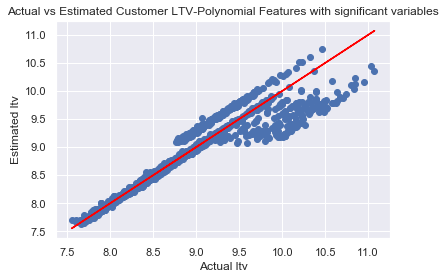

In [154]:
# Model graph to see predictions


x_test = sm.add_constant(x_test)

y_preds = model.predict(x_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv" )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features with significant variables")
plt.show()

In [155]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.10405547782011168
Mean Sq. Error (MSE)          : 0.042846646158071953
Root Mean Sq. Error (RMSE)     : 0.20699431431339352
Mean Abs. Perc. Error (MAPE) : 1.0960390852238049


In [156]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)
all_scores = []
all_scores.append((model.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

In [157]:
df_allscore = pd.DataFrame(all_scores)

In [158]:
df_allscore

,0,1,2,3,4
0,0.90,1559.20,16145118.53,4018.10,9.96


In [159]:
df_allscore.columns = ['R2', 'MAE', 'MSE','RMSE','MAPE']

In [160]:
df_allscore

,R2,MAE,MSE,RMSE,MAPE
0,0.90,1559.20,16145118.53,4018.10,9.96


# Let's check the test /train data prediction if there is underfitting/overfitting problem

### ALL MODELS USING KFOLD CROSS VALIDATION

In [161]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score

In [162]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
models=[lr,dt,dt1,rfr,rfr1,knn,bag,boost]
for model in models:
    cv_results = model_selection.cross_val_score(model,x,y,cv = kfold)
    print(model,np.mean(cv_results),np.var(cv_results,ddof=1))

LinearRegression() 0.9012484958596683 6.165964979483244e-05
DecisionTreeRegressor() 0.8305034219343581 0.00042814334322777397
DecisionTreeRegressor(max_depth=7) 0.8950385982297179 0.0001225555380866705
RandomForestRegressor() 0.9085153113770925 0.00010429026084672185
RandomForestRegressor(max_depth=9, n_estimators=27) 0.9060026991974032 0.00010143680472032106
KNeighborsRegressor() 0.7480790129704681 0.0009054780170084091
BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=7)) 0.9021138086632395 9.178031367806096e-05
AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=9,
                                                       n_estimators=27)) 0.900500112658314 8.006114820665754e-05


We have created many models to reach the best model with highest R-square and lower error terms.

In the light of comparison table, we could choose to go for the model which have both log transformation and polynomial features. We see that R square is 0.91 means that 91% of the variance can be explained, which is really high.

It seems like I predict values really good! Actual scores and predicted scores have good linearity but after some point we see that linearity is not good enough. In the graph, it is seen that customer life time value prediction is better with the values lower than 10.000. If we predict customer LTV lower than 10.000, we see that Mean Sq. Error decreased from 0.04 to 0.02 which is almost half of the initial error.We do not see overfitting problem with the model.

From marketing perspective, we have a better opinion which customer have higher predicted life time value. With that information it is easier to lead marketing activities into more profitable scale.